<a href="https://colab.research.google.com/github/Kieunhungtruong/Econometrics/blob/main/chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


<div style="display: flex; flex-direction: column; align-items: center; justify-content: center; gap: 10px;">
    <h1 style="text-align: center; font-size: 26px; font-weight: bold; font-family:'Nunito'; color: purple;">
        Chapter 3
    </h1>
</div>


**Gọi các gói cần thiết trong chương 3**

In [85]:
!pip install pyreadstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import pyreadstat
from statsmodels.nonparametric.smoothers_lowess import lowess


In [86]:
# Bảng màu mẫu
palette = ["#53b0ae", "#a31414", "#2b6999", "#e37000", "#b2c615", "#88837d","#B3B3B3"]
labels = ["cyan", "Red", "Dark Blue", "Orange", "Green", "Gray","Light Gray"]

In [87]:
df, meta = pyreadstat.read_dta("/content/drive/MyDrive/econometrics/rawdata/migration_remittances_16_full.dta", encoding='latin1')
df

,tinh,huyen,xa,diaban,hoso,num_migration,marital_status,HHsize,agehead,num_children0_5,...,durables_share,housing_share,others_share,healthcare_share,education_share,RedRiverDelta,Northmidlandareas,CentralCoast,Centralhighlands,MekongRiverDelta
0,1,1,4,8,14,NaN,0,2.0,63.0,0.0,...,0.000000,0.030590,0.021175,0.004854,0.044689,1.0,0.0,0.0,0.0,0.0
1,1,1,4,8,15,NaN,1,5.0,37.0,0.0,...,0.026955,0.011273,0.006304,0.000797,0.006511,1.0,0.0,0.0,0.0,0.0
2,1,1,4,8,19,NaN,1,2.0,61.0,0.0,...,0.000000,0.027630,0.013743,0.014355,0.000000,1.0,0.0,0.0,0.0,0.0
3,1,1,7,6,13,NaN,1,3.0,62.0,0.0,...,0.018952,0.022694,0.014611,0.002366,0.056978,1.0,0.0,0.0,0.0,0.0
4,1,1,7,6,14,NaN,1,5.0,62.0,0.0,...,0.000000,0.067794,0.004254,0.011658,0.002564,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9394,96,973,32242,18,14,NaN,1,4.0,57.0,0.0,...,0.006153,0.003076,0.004692,0.004922,0.000000,0.0,0.0,0.0,0.0,1.0
9395,96,973,32242,18,15,NaN,1,3.0,53.0,0.0,...,0.000000,0.007322,0.001611,0.115197,0.000000,0.0,0.0,0.0,0.0,1.0
9396,96,973,32248,9,13,NaN,1,5.0,45.0,0.0,...,0.000000,0.006577,0.005098,0.030914,0.004440,0.0,0.0,0.0,0.0,1.0
9397,96,973,32248,9,14,NaN,1,4.0,36.0,0.0,...,0.000000,0.005244,0.007342,0.013635,0.005874,0.0,0.0,0.0,0.0,1.0


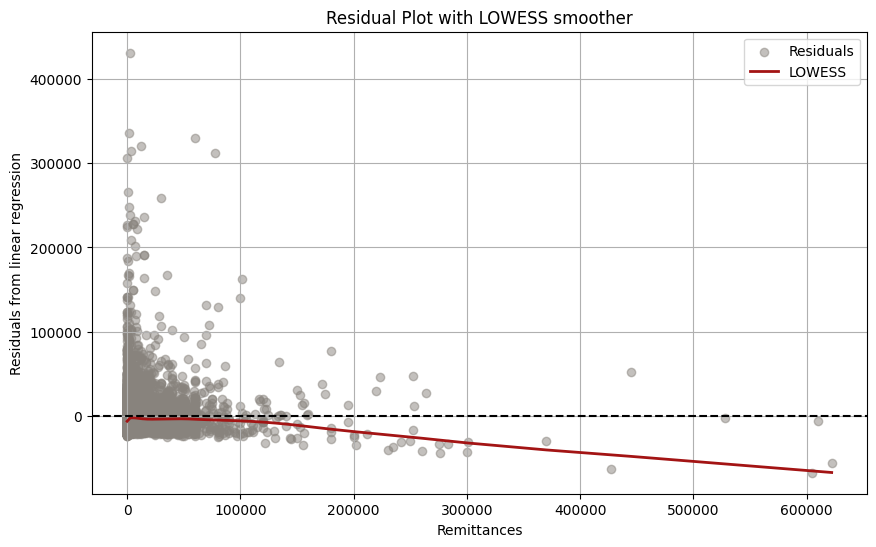

In [88]:
X = sm.add_constant(df['remittances']) # Thêm cột intercept (hằng số) vào biến độc lập
model = sm.OLS(df['per_expenditure'], X).fit()
# Tính phần dư
df['residuals'] = model.resid
lowess_result = lowess(df['residuals'], df['remittances'])
plt.figure(figsize=(10,6))
plt.scatter(df['remittances'], df['residuals'],color=palette[5], alpha=0.5, label='Residuals')
plt.plot(lowess_result[:,0], lowess_result[:,1], color=palette[1], linewidth=2, label='LOWESS')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Remittances")
plt.ylabel("Residuals from linear regression")
plt.title("Residual Plot with LOWESS smoother")
plt.legend()
plt.grid(True)
plt.show()

#Kiểm định Breusch–Pagan

## Bước 1: Ước lượng mô hình hồi quy OLS như đã thực hiện ở bước trên
```X = sm.add_constant(df['remittances'])```

```model = sm.OLS(df['per_expenditure'], X).fit()```

## Bước 2: Lấy phần dư và bình phương phần dư
### Tính phần dư
```df['residuals'] = model.resid```

In [89]:
df['squared_residuals'] = df['residuals'] ** 2

### Bước 3: Hồi quy phần dư bình phương với biến độc lập ban đầu

In [90]:
X_rsq = sm.add_constant(df['remittances'])
model_rsq = sm.OLS(df['squared_residuals'], X_rsq).fit()
print(model_rsq.summary())

                            OLS Regression Results                            
Dep. Variable:      squared_residuals   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     11.37
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           0.000748
Time:                        11:03:40   Log-Likelihood:            -2.2140e+05
No. Observations:                9399   AIC:                         4.428e+05
Df Residuals:                    9397   BIC:                         4.428e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.623e+08   4.48e+07     10.314      

In [91]:
n = len(df)
R2 = model_rsq.rsquared
LM_stat = n * R2

from scipy.stats import chi2
# Kiểm định với bậc tự do là số biến độc lập (không tính hệ số chặn)
p_value = 1 - chi2.cdf(LM_stat, df=1)

print(f"LM statistic: {LM_stat}")
print(f"P-value: {p_value}")

LM statistic: 11.362817105178038
P-value: 0.0007492908832411604


### Kiểm định Breusch–Pagan một cách trực tiếp bằng lệnh có sẵn trong thư viện statsmodels

In [92]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(df['residuals'], X)
labels = ['LM Statistic', 'LM p-value', 'F Statistic', 'F p-value']
for name, val in zip(labels, bp_test):
    print(f"{name}: {val}")

LM Statistic: 11.362817105178038
LM p-value: 0.0007492908832411111
F Statistic: 11.37414988000535
F p-value: 0.0007477393557890135


##### Hoặc nếu không tạo ra biến ```df['residuals']``` và ```X```, chúng ta có thể truyền vào phần dư và ma trận biến độc lập như sau:
```bp_test = het_breuschpagan(model.resid, model.model.exog)```


#Kiểm định White

In [93]:
from statsmodels.stats.diagnostic import het_white
white_test = het_white(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM p-value', 'F Statistic', 'F p-value']
for name, val in zip(labels, white_test):
    print(f"{name}: {val}")

LM Statistic: 14.168901341055065
LM p-value: 0.0008380350181996505
F Statistic: 7.092881885726272
F p-value: 0.0008354559185167248


#Kiểm định White có điều chỉnh

## Bước 1: Hồi quy OLS gốc và lấy phần dư và bình phương phần dư


```
X = sm.add_constant(df['remittances'])
y = df['per_expenditure']
model = sm.OLS(y, X).fit()

df['residuals'] = model.resid
df['squared_residuals'] = df['residuals'] ** 2
```



##Bước 2: Tạo yhat và yhat^2


In [94]:
df['yhat'] = model.fittedvalues
df['yhat2'] = df['yhat'] ** 2

##Bước 3: Hồi quy rsq ~ yhat + yhat^2

In [95]:
X_white_adj = sm.add_constant(df[['yhat', 'yhat2']])
model_adj = sm.OLS(df['squared_residuals'] , X_white_adj).fit()
print(model_adj.summary())

                            OLS Regression Results                            
Dep. Variable:      squared_residuals   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     7.093
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           0.000835
Time:                        11:03:40   Log-Likelihood:            -2.2139e+05
No. Observations:                9399   AIC:                         4.428e+05
Df Residuals:                    9396   BIC:                         4.428e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.061e+09   8.84e+08     -2.332      0.0

### Tính thống kê kiểm định White có điều chỉnh: LM = n * R^2

In [96]:
n = len(df)
LM_white_adj = n * model_adj.rsquared
print(f"LM White (adjusted) statistic: {LM_white_adj}")

LM White (adjusted) statistic: 14.168901341051935


#Sử dụng bình phương nhỏ nhất có trọng số (Weighted Least Squares: WLS)

##1. Biến đổi mô hình theo cách chuẩn hoá sao cho giả định phương sai không đổi được thỏa mãn.
<p>Giả định rằng phương sai của sai số tỉ lệ với bình phương của biến <code>remittances</code>, ta có:</p>

<p style="text-align: center;">
$$
\text{Var}(\varepsilon_i) \propto \text{remittances}_i^2
$$
</p>

<p>
Do đó, ta nhân cả hai vế của phương trình hồi quy với:
</p>

<p style="text-align: center;">
$$
\frac{1}{\text{remittances}_i}
$$
</p>

<p>
Điều này giúp đưa mô hình về dạng có phương sai đồng nhất, và có thể ước lượng lại bằng OLS.
</p>




### Bước 1: Tạo các biến chuẩn hoá theo trọng số $$\frac{1}{\text{remittances}}$$


In [97]:
# Tạo bản sao dữ liệu
df1 = df.copy()
df1 = df1[df1['remittances'] != 0]
# Trọng số = 1 / remittances
df1['weight'] = 1 / df1['remittances']

# Nhân các biến với weight
df1['per_expenditure_w'] = df1['per_expenditure'] * df1['weight']
df1['remittances_w'] = df1['remittances'] * df1['weight']
df1['constant_w'] = df1['weight']  # giống như gen constant_w = 1/remittances


### Bước 2: Hồi quy OLS không chặn với các biến đã chuẩn hoá (sử dụng df1)

In [98]:
# Tạo X và y
X_manual = df1[['remittances_w', 'constant_w']]
y_manual = df1['per_expenditure_w']

# Hồi quy OLS không chặn
model_manual = sm.OLS(y_manual, X_manual).fit()

# Kết quả
print(model_manual.summary())

                            OLS Regression Results                            
Dep. Variable:      per_expenditure_w   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     9120.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        11:03:40   Log-Likelihood:                -47767.
No. Observations:                7953   AIC:                         9.554e+04
Df Residuals:                    7951   BIC:                         9.555e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
remittances_w    -2.1016      1.188     -1.769

###Phiên bản chuẩn hơn dùng statsmodels.WLS (sử dụng df2)

In [99]:
df2 = df.copy()
# Xoá các dòng bị lỗi
df2 = df2.replace([np.inf, -np.inf], np.nan)
# Loại bỏ remittances = 0
df2 = df2[df2['remittances'] != 0]
w= 1 / df2['remittances']  # đây là weight như STATA dùng
X = sm.add_constant(df2['remittances'])  # có constant
y = df2['per_expenditure']
weights = w**2 # phải bình phương để đúng với WLS
model_wls = sm.WLS(y, X, weights=weights ).fit()
print(model_wls.summary())

                            WLS Regression Results                            
Dep. Variable:        per_expenditure   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.129
Date:                Mon, 02 Jun 2025   Prob (F-statistic):             0.0770
Time:                        11:03:40   Log-Likelihood:            -1.1032e+05
No. Observations:                7953   AIC:                         2.206e+05
Df Residuals:                    7951   BIC:                         2.207e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.484e+04    260.110     95.497      

##2. Biến đổi mô hình theo cách chuẩn hoá sao cho giả định phương sai không đổi được thỏa mãn.
<p>Giả định rằng phương sai của sai số tỉ lệ với biến <code>remittances</code>, ta có:</p>

<p style="text-align: center;">
$$
\text{Var}(\varepsilon_i) \propto \text{remittances}_i
$$
</p>

<p>
Do đó, ta nhân cả hai vế của phương trình hồi quy với:
</p>

<p style="text-align: center;">
$$
\frac{1}{\sqrt{\text{remittances}_i}}
$$
</p>

<p>
Điều này giúp đưa mô hình về dạng có phương sai đồng nhất, và có thể ước lượng lại bằng OLS.
</p>

### Bước 1: Tạo các biến chuẩn hoá theo trọng số $$\frac{1}{\sqrt{\text{remittances}}}$$


In [100]:
# Tạo bản sao dữ liệu
df3 = df.copy()
df3 = df3[df3['remittances'] != 0]
# Trọng số = 1 / remittances
df3['weight_sqrt'] = 1 / np.sqrt(df3['remittances'])

# Nhân các biến với weight
df3['per_expenditure_w_sqrt'] = df3['per_expenditure'] * df3['weight_sqrt']
df3['remittances_w_sqrt'] = df3['remittances'] * df3['weight_sqrt']
df3['constant_w_sqrt'] = df3['weight_sqrt']

### Bước 2: Hồi quy OLS không chặn với các biến đã chuẩn hoá (sử dụng df3)

In [101]:
# Tạo X và y
X_manual = df3[['remittances_w_sqrt', 'constant_w_sqrt']]
y_manual = df3['per_expenditure_w_sqrt']

# Hồi quy OLS không chặn
model_manual = sm.OLS(y_manual, X_manual).fit()

# Kết quả
print(model_manual.summary())


                                   OLS Regression Results                                  
Dep. Variable:     per_expenditure_w_sqrt   R-squared (uncentered):                   0.581
Model:                                OLS   Adj. R-squared (uncentered):              0.581
Method:                     Least Squares   F-statistic:                              5508.
Date:                    Mon, 02 Jun 2025   Prob (F-statistic):                        0.00
Time:                            11:03:40   Log-Likelihood:                         -64744.
No. Observations:                    7953   AIC:                                  1.295e+05
Df Residuals:                        7951   BIC:                                  1.295e+05
Df Model:                               2                                                  
Covariance Type:                nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      

###Phiên bản chuẩn hơn dùng statsmodels.WLS (sử dụng df4)

In [102]:
df4 = df.copy()
# Xoá các dòng bị lỗi
df4 = df4.replace([np.inf, -np.inf], np.nan)
# Loại bỏ remittances = 0
df4 = df4[df4['remittances'] != 0]
w= 1 / np.sqrt(df4['remittances'])  # đây là weight như STATA dùng
X = sm.add_constant(df4['remittances'])  # có constant
y = df4['per_expenditure']
weights = w**2 # phải bình phương để đúng với WLS
model_wls = sm.WLS(y, X, weights=weights ).fit()
print(model_wls.summary())

                            WLS Regression Results                            
Dep. Variable:        per_expenditure   R-squared:                       0.002
Model:                            WLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     12.73
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           0.000362
Time:                        11:03:40   Log-Likelihood:                -96022.
No. Observations:                7953   AIC:                         1.920e+05
Df Residuals:                    7951   BIC:                         1.921e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.341e+04    232.068    100.878      

##3. Phương pháp lấy log cho dữ liệu để kiểm soát phương sai

In [103]:
df5=df.copy()
df5 = df5[df5['remittances'] > 0]
df5 = df5[df5['per_expenditure'] > 0]
df5['ln_remittances'] = np.log(df5['remittances'])
X = sm.add_constant(df5['ln_remittances'])  # có constant
df5['ln_per_expenditure'] = np.log(df5['per_expenditure'])
model = sm.OLS(df5['ln_per_expenditure'],X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     ln_per_expenditure   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     478.7
Date:                Mon, 02 Jun 2025   Prob (F-statistic):          4.40e-103
Time:                        11:03:40   Log-Likelihood:                -7210.2
No. Observations:                7953   AIC:                         1.442e+04
Df Residuals:                    7951   BIC:                         1.444e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3161      0.032    294.

### Kiểm định Breusch–Pagan một cách trực tiếp bằng lệnh có sẵn trong thư viện statsmodels

In [104]:
X = sm.add_constant(df5['ln_remittances'])  # kiểm định với biến gốc (không log)
residuals = model.resid
# Thực hiện kiểm định Breusch-Pagan
bp_test = het_breuschpagan(residuals, X)
labels = ['LM Statistic', 'LM p-value', 'F Statistic', 'F p-value']

for name, val in zip(labels, bp_test):
    print(f"{name}: {val}")

LM Statistic: 15.86457952659139
LM p-value: 6.804030920631935e-05
F Statistic: 15.892291756866868
F p-value: 6.765123979443373e-05


###Chọn trọng số là giá trị dự báo yhat

In [107]:
X0 = sm.add_constant(df['remittances'])
model0 = sm.OLS(df['per_expenditure'], X0).fit()
df['yhat'] = model0.fittedvalues
df['yhat2'] = df['yhat'] ** 2

# 2. Tạo trọng số tương đương analytic weights của Stata
df_valid = df[df['yhat2'] > 0].copy()
weights = 1 / df_valid['yhat2']

# 3. Hồi quy WLS giống Stata: analytic weights ~ 1/variance
X = sm.add_constant(df_valid['remittances'])
y = df_valid['per_expenditure']

model0 = sm.WLS(y, X, weights=weights).fit()
print(model0.summary())


                            WLS Regression Results                            
Dep. Variable:        per_expenditure   R-squared:                       0.014
Model:                            WLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     131.0
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           3.85e-30
Time:                        11:07:26   Log-Likelihood:            -1.0743e+05
No. Observations:                9399   AIC:                         2.149e+05
Df Residuals:                    9397   BIC:                         2.149e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.511e+04    248.091    101.229      

KeyError: 'weight'

In [110]:
# OR
df['per_expenditure_w'] = df['per_expenditure']* df['weights']
df['remittances_w'] = df['remittances'] * df['weights']
X1 = sm.add_constant(df['remittances_w'])

model1 = sm.OLS(df['per_expenditure_w'], X1).fit()
print(model1.summary())

KeyError: 'weights'

### Kiểm định Breusch–Pagan một cách trực tiếp bằng lệnh có sẵn trong thư viện statsmodels



LM Statistic: 22.457021598659654
LM p-value: 2.148984705927366e-06
F Statistic: 22.50601660427599
F p-value: 2.1257388791796755e-06


#Vì sao không dùng luôn pandas.read_stata()?
1. pyreadstat là thư viện chuyên đọc file STATA (dta) rất mạnh và nhanh
2. Được viết bằng C → rất nhanh và ổn định hơn cho file .dta nặng hoặc nhiều nhãn phức tạp.
3. Hỗ trợ đọc label (value formats) rõ ràng, có thêm meta.
4. Là backend của pandas.read_stata() luôn đó! Pandas thực ra dùng pyreadstat phía sau.



<h2 style="font-size: 26px; font-weight: bold; font-family:'Nunito'; color: purple;">About the Authors:</h2>

<a href="https://www.linkedin.com/in/truongnhung2002"> Nhung Truong (Kristen Zhang) </a> has a degree in Investment Economics from UEH, with a focus on quantitative research. Her work revolves around data analysis and research. Currently, she is working at HAPRI as a research assistant.

## <h3 align="center"> © Nhung Truong. All rights reserved. <h3/>

<p>